/tmp/ipykernel_352326/1397467351.py:59: RuntimeWarning: Mean of empty slice
  k1 = np.nanmean(kappa_1, axis=1)
/tmp/ipykernel_352326/1397467351.py:60: RuntimeWarning: Mean of empty slice
  k2 = np.nanmean(kappa_2, axis=1)


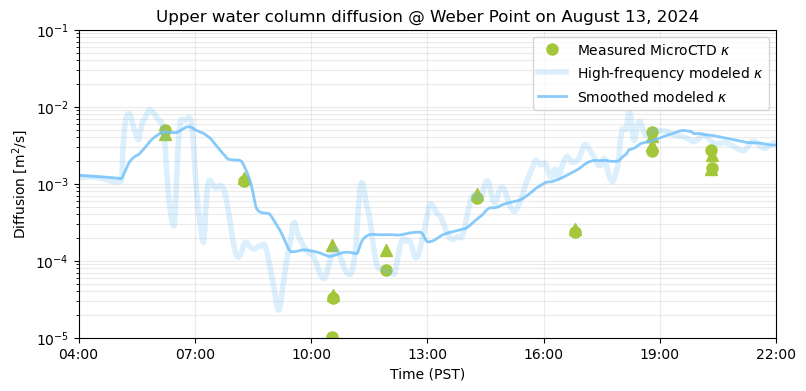

In [63]:
import xarray as xr 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.dates as mdates

# get dates
dates = pd.read_csv("/global/homes/s/siennaw/scratch/siennaw/turbulence-model/data/CIMIS/PAR_on_august_9-15.csv")
dates = dates.time 
dates = pd.to_datetime(dates)
dates = dates[::6].reset_index(drop=True)
dates = dates[0:-1]
# dates = dates[0:-1]

fig = plt.figure(figsize=(9,4))
ax = plt.gca()

colors = ["#a4c639", "#73c2fb", "#d1001c"]


date = "aug_13_2024"

##### Weber Point

def calculate_unaveraged_scales(data):
    nu = 1e-6 

    L_k1 = (nu**3/ data.epsilon1)**(1/4)
    L_k2 = (nu**3/ data.epsilon2)**(1/4)

    Re_T1 = (data.thorpe1 / L_k1)**(4/3)
    Re_T2 = (data.thorpe2 / L_k2)**(4/3)

    Fr_T1 = (data.ozmidov1 / data.thorpe1)**(2/3)
    Fr_T2 = (data.ozmidov2 / data.thorpe2)**(2/3)
    
    return Re_T1, Re_T2, Fr_T1, Fr_T2


site = "WP" 
fout = "/pscratch/sd/s/siennaw/stockton_field_data/microctd/%s_eps_%s_Layer=1000.nc" % (site, date)

data = xr.open_dataset(fout)
data = data.sortby('time')
data = data.dropna(dim='time', how="all")

# Take surface layer 
surface_data = data.sel(z=slice(2, 0)) 
t = pd.to_datetime(surface_data.time.values)

Re_1, Re_2, Fr_1, Fr_2 = calculate_unaveraged_scales(surface_data)

Rf_1 = 1 / (1 + 3*Fr_1**2)
Rf_2 = 1 / (1 + 3*Fr_2**2)

kappa_1 = (Rf_1 / (1 + Rf_1)) * (surface_data.epsilon1/ (surface_data.N1))
kappa_2 = (Rf_2 / (1 + Rf_2)) * (surface_data.epsilon2/ (surface_data.N2))

k1 = np.nanmean(kappa_1, axis=1)
k2 = np.nanmean(kappa_2, axis=1)

ax.plot(t, k1, 'o', color=colors[0], markersize=8, label="Measured MicroCTD $\kappa$")
ax.plot(t, k2, '^', color=colors[0], markersize=8)

ds = xr.open_dataset("output/STRAT_HIGH_RES_0.nc")
kz_ = ds.Kz.sel(z=slice(2, 0)) 
kz_.values[kz_.values > 2e-2] = 1e-2
kz_av = kz_.mean(dim="z") # np.nanmean(kz2.values, axis=0)
# kz_av = kz_av.rolling(time=2, center=True).mean()
ax.plot(dates, kz_av.rolling(time=6).mean(), linewidth=4, alpha=0.25, color=colors[1], label="High-frequency modeled $\kappa$")
ax.plot(dates, kz_av.rolling(time=100).mean(), '-', linewidth=2, alpha=0.85, color=colors[1], label="Smoothed modeled $\kappa$")


ax.set_xlim(pd.to_datetime("August 13, 2024 04:00"), pd.to_datetime("August 13, 2024 22:00"))
# format the dateimte axis with mdates
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid(alpha=0.25, which="both")
ax.set_ylabel("Diffusion [m$^2$/s]")
ax.set_xlabel("Time (PST)")
ax.legend()
ax.set_ylim(1e-5, 1e-1)
ax.set_yscale('log')
ax.set_title("Upper water column diffusion @ Weber Point on August 13, 2024")
plt.show()



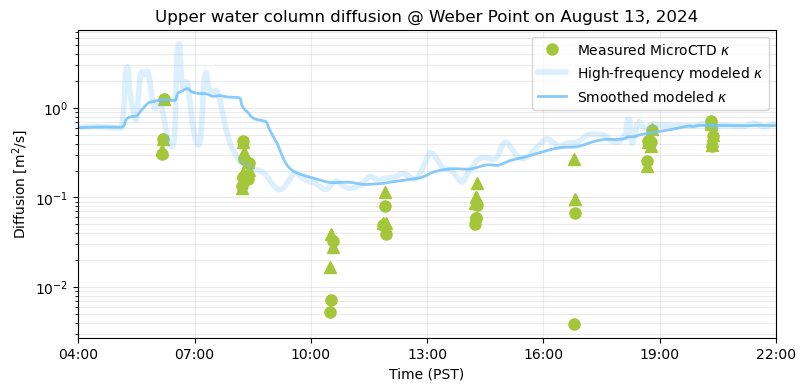

In [67]:

fig = plt.figure(figsize=(9,4))
ax = plt.gca()



date = "aug_13_2024"

##### Weber Point



# Take surface layer 
t = pd.to_datetime(surface_data.time.values)

L1 = np.nanmean(surface_data.thorpe1, axis=1)
L2 = np.nanmean(surface_data.thorpe2, axis=1)

ax.plot(t, L1, 'o', color=colors[0], markersize=8, label="Measured MicroCTD $\kappa$")
ax.plot(t, L2, '^', color=colors[0], markersize=8)

ds = xr.open_dataset("output/STRAT_HIGH_RES_0.nc")
kz_ = ds.L.sel(z=slice(4, 0)) 
# kz_.values[kz_.values > 2e-2] = 1e-2
kz_av = kz_.mean(dim="z") # np.nanmean(kz2.values, axis=0)
# kz_av = kz_av.rolling(time=2, center=True).mean()
ax.plot(dates, kz_av.rolling(time=6).mean(), linewidth=4, alpha=0.25, color=colors[1], label="High-frequency modeled $\kappa$")
ax.plot(dates, kz_av.rolling(time=100).mean(), '-', linewidth=2, alpha=0.85, color=colors[1], label="Smoothed modeled $\kappa$")


ax.set_xlim(pd.to_datetime("August 13, 2024 04:00"), pd.to_datetime("August 13, 2024 22:00"))
# format the dateimte axis with mdates
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid(alpha=0.25, which="both")
ax.set_ylabel("Diffusion [m$^2$/s]")
ax.set_xlabel("Time (PST)")
ax.legend()
# ax.set_ylim(1e-5, 1e-1)
ax.set_yscale('log')
ax.set_title("Upper water column diffusion @ Weber Point on August 13, 2024")
plt.show()



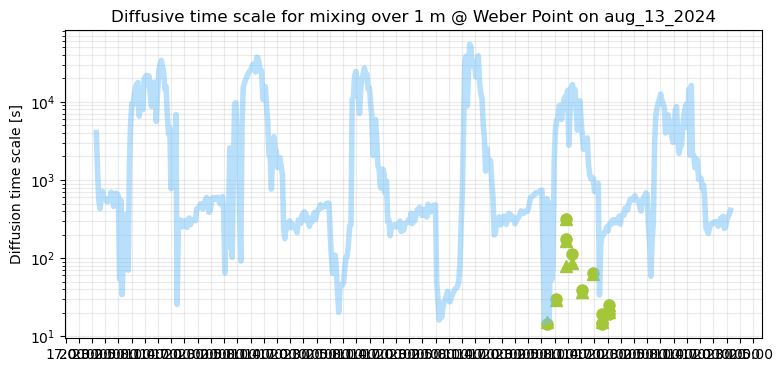

In [25]:
fig2 = plt.figure(figsize=(9,4))
ax2 = plt.gca()
ax2.plot(t, np.sqrt(1/k1), 'o', color=colors[0], markersize=8, label="MicroCTD $T_{\epsilon}$")
ax2.plot(t, np.sqrt(1/k2), '^', color=colors[0], markersize=8, label="MicroCTD $T_{\epsilon}$")
ax2.plot(dates, 1/kz_av, linewidth=4, alpha=0.5, color=colors[1], label="One-dimension modeled $\kappa$")

# ax2.hlines(1/(diatom), t[0], t[-1], color=colors[2], label="1.4e-5 m/s", linestyle="--")
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax2.grid(alpha=0.25, which="both")
# ax2.set_xlim(dates[175], dates[220])
ax2.set_yscale('log')
ax2.set_ylabel("Diffusion time scale [s]")
ax2.set_ylabel("Diffusion time scale [s]")
ax2.set_title("Diffusive time scale for mixing over 1 m @ Weber Point on %s" % date)
fig.savefig("aug_27.png")